In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

#Import CPI all items in WPB/FLL/MIA
cpi_all_path = Path("cpi_all.csv")
cpi_all_df = pd.read_csv(cpi_all_path)


#Clean Data
cpi_all_df.drop(31, inplace = True)
cpi_all_df = cpi_all_df.rename(columns={'CUURA320SA0_PCH': 'Percent Change'})
cpi_all_df = cpi_all_df.rename(columns={'DATE': 'Date'})
cpi_all_df.head()

,Date,Percent Change
0,7/1/2015,0.25558
1,10/1/2015,0.14005
2,1/1/2016,0.17552
3,4/1/2016,0.95032
4,7/1/2016,0.31606


In [2]:
#Import CPI Rent Prices in WPB/FLL/MIA
cpi_rent_path = Path("cpi_rent.csv")
cpi_rent_df = pd.read_csv(cpi_rent_path)
cpi_rent_df

#Clean Data
cpi_rent_df.drop(31, inplace = True)
cpi_rent_df = cpi_rent_df.rename(columns={'CUURA320SEHA_PCH': 'Percent Change'})
cpi_rent_df = cpi_rent_df.rename(columns={'DATE': 'Date'})
cpi_rent_df.head()

,Date,Percent Change
0,7/1/2015,0.96018
1,10/1/2015,1.04696
2,1/1/2016,1.02295
3,4/1/2016,1.52611
4,7/1/2016,1.42735


In [3]:
#mergedcpi_df = pd.merge(cpi_rent_df, cpi_all_df, on 'Date', how = 'inner')
mergedcpi_df = cpi_rent_df.merge(cpi_all_df, on='Date', suffixes=(' Rent', ' All Items'))

mergedcpi_df.head()

,Date,Percent Change Rent,Percent Change All Items
0,7/1/2015,0.96018,0.25558
1,10/1/2015,1.04696,0.14005
2,1/1/2016,1.02295,0.17552
3,4/1/2016,1.52611,0.95032
4,7/1/2016,1.42735,0.31606


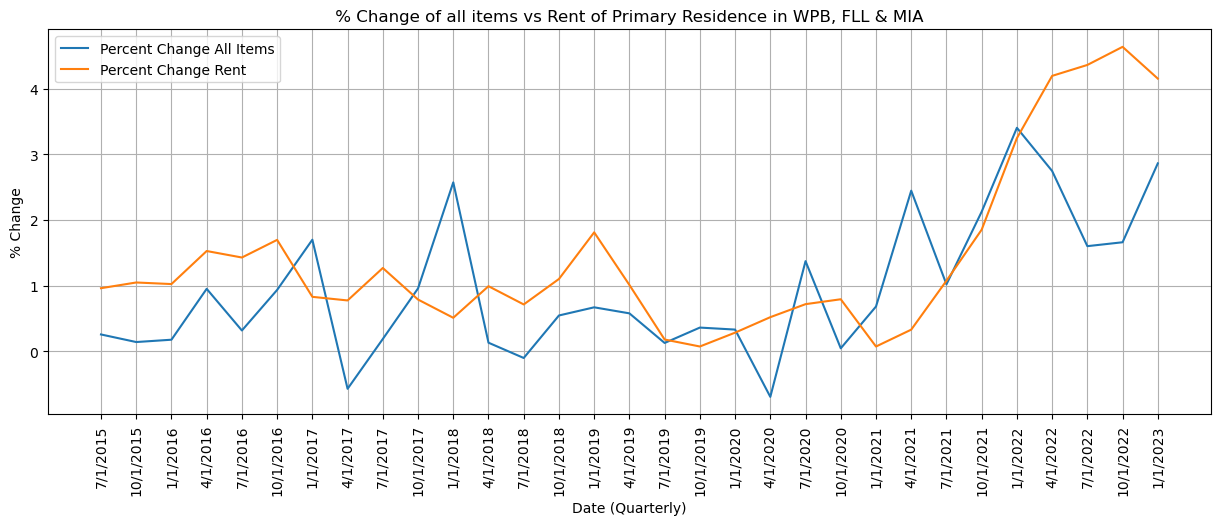

In [4]:
# Extract the x- and y-axes for each DataFrame
mergedcpi_x = mergedcpi_df["Date"]
mergedcpi_y = cpi_all_df["Percent Change"]
mergedcpi_y1 = cpi_rent_df["Percent Change"]

# Create the line chart
plt.figure(figsize=(15, 5))
plt.plot(mergedcpi_x, mergedcpi_y, label=("Percent Change All Items"))
plt.plot(mergedcpi_x, mergedcpi_y1, label=("Percent Change Rent"))


# Add a title, labels, and grid lines
plt.title(" % Change of all items vs Rent of Primary Residence in WPB, FLL & MIA ")
plt.ylabel("% Change")
plt.xlabel("Date (Quarterly)")
plt.xticks(rotation=90)
#plt.ylim(280,450)
plt.grid(True)

# Add a legend and show the plot
plt.legend()
plt.show()

In [5]:
#Hypothesis Testing
# Null Hpothesis: H0: There is no significant linear relationship between the CPI of all items and the CPI of rental prices of primary residences.
# Alternative Hypothesis: H1: There is a significant linear relationship between the CPI of all items and the CPI of rental prices of primary residences.

In [23]:
from scipy import stats

# Extract the independent and dependent variables
X = cpi_all_df['Percent Change']
y = cpi_rent_df['Percent Change']

# Fit the linear regression model
model = stats.linregress(X, y)

# Print the model coefficients
print('Intercept:', model.intercept)
print('Slope:', model.slope)

# Print the R-squared and p-value
print('R-squared:', model.rvalue**2)
print('p-value:', model.pvalue)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between CPI of all items and CPI of rental prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between CPI of all items and CPI of rental prices.")

Intercept: 0.7333523367269871
Slope: 0.7187216719506112
R-squared: 0.3353048290585841
p-value: 0.0006424108360715663
Fail to reject the null hypothesis. There is no significant relationship between CPI of all items and CPI of rental prices.


In [9]:
"""import numpy as np
from scipy.stats import pearsonr

# Extract 'Percentage Change' columns from the dataframes
cpi_all = cpi_all_df['Percent Change'].astype(float)
cpi_rent = cpi_rent_df['Percent Change'].astype(float)

# Perform the Pearson correlation test
corr_coefficient, p_value = pearsonr(cpi_all_df, cpi_rent_df)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between CPI of all items and CPI of rental prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between CPI of all items and CPI of rental prices.")"""

'import numpy as np\nfrom scipy.stats import pearsonr\n\n# Extract \'Percentage Change\' columns from the dataframes\ncpi_all = cpi_all_df[\'Percent Change\'].astype(float)\ncpi_rent = cpi_rent_df[\'Percent Change\'].astype(float)\n\n# Perform the Pearson correlation test\ncorr_coefficient, p_value = pearsonr(cpi_all_df, cpi_rent_df)\n\n# Set the significance level (alpha)\nalpha = 0.05\n\n# Check if the p-value is less than alpha to determine statistical significance\nif p_value < alpha:\n    print("Reject the null hypothesis. There is a significant relationship between CPI of all items and CPI of rental prices.")\nelse:\n    print("Fail to reject the null hypothesis. There is no significant relationship between CPI of all items and CPI of rental prices.")'

In [25]:
import numpy as np
from scipy.stats import pearsonr, ttest_1samp

# Extract 'Percentage Change' columns from the dataframes as arrays
cpi_all = np.array(cpi_all_df['Percent Change'].astype(float))
cpi_rent = np.array(cpi_rent_df['Percent Change'].astype(float))

# Perform the Pearson correlation test
corr_coefficient, p_value = pearsonr(cpi_all, cpi_rent)

# Set the significance level (alpha)
alpha = 0.05

# Perform a one-tailed test to test the direction of the correlation
t_statistic, p_value = ttest_1samp(corr_coefficient, 0.0)

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant positive relationship between CPI of all items and CPI of rental prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between CPI of all items and CPI of rental prices.")


Fail to reject the null hypothesis. There is no significant relationship between CPI of all items and CPI of rental prices.


In [11]:
p_value

nan

In [12]:
alpha

0.05

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

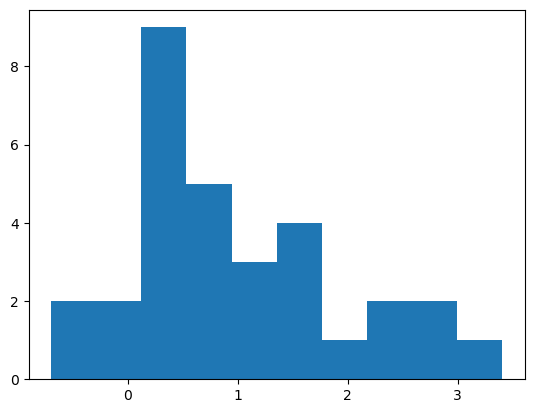

In [13]:
# Visiual Test to see if Normally Distributed
plt.hist(cpi_all_df['Percent Change'])
plt.hist

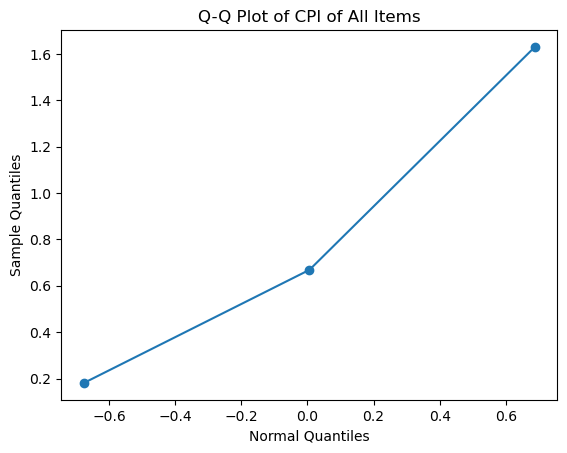

In [14]:
# Calculate the quantiles of the 'Percent Change' column
q = np.quantile(cpi_all_df['Percent Change'], [0.25, 0.5, 0.75])

# Calculate the quantiles of the normal distribution
q_norm = np.quantile(np.random.normal(loc=0, scale=1, size=10000), [0.25, 0.5, 0.75])

# Create a Q-Q plot
plt.plot(q_norm, q, 'o-')

# Set the title and axis labels
plt.title('Q-Q Plot of CPI of All Items')
plt.xlabel('Normal Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()

<function matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)>

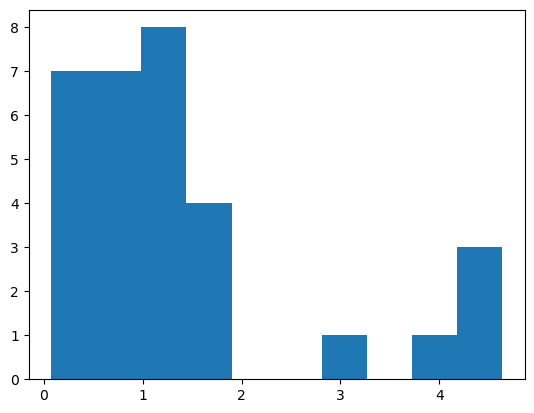

In [15]:
# Visiual Test to see if Normally Distributed
plt.hist(cpi_rent_df['Percent Change'])
plt.hist

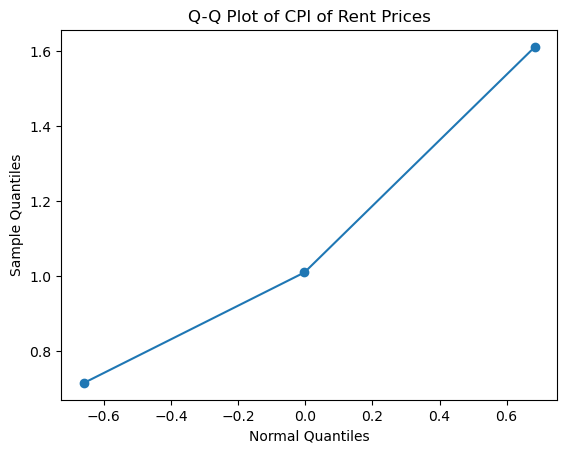

In [18]:
# Calculate the quantiles of the 'Percent Change' column
q = np.quantile(cpi_rent_df['Percent Change'], [0.25, 0.5, 0.75])

# Calculate the quantiles of the normal distribution
q_norm = np.quantile(np.random.normal(loc=0, scale=1, size=10000), [0.25, 0.5, 0.75])

# Create a Q-Q plot
plt.plot(q_norm, q, 'o-')

# Set the title and axis labels
plt.title('Q-Q Plot of CPI of Rent Prices')
plt.xlabel('Normal Quantiles')
plt.ylabel('Sample Quantiles')

# Show the plot
plt.show()